In [ ]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family = 'Malgun Gothic')

# 1. Data Load


In [ ]:
df = pd.read_csv('./car.csv')

In [ ]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker,Price
0,2015,41000,Diesel,First,19.67,1582,126.20,5.0,NaN,Hyundai,12.50
1,2011,46000,Petrol,First,18.20,1199,88.70,5.0,8.61,Honda,4.50
2,2012,87000,Diesel,First,20.77,1248,88.76,7.0,NaN,Maruti,6.00
3,2013,40670,Diesel,Second,15.20,1968,140.80,5.0,NaN,Audi,17.74
4,2013,86999,Diesel,First,23.08,1461,63.10,5.0,NaN,Nissan,3.50


# 2. Data Preprocessing

특정 조건 데이터를 추출하는 단계

1. 결측 데이터 추출하기

#### 이번 챕터는 과정이 복잡하므로 전처리 단계에서 line by line으로 설명하는 단계를 추가함

## 2-1. 결측 데이터 확인

In [ ]:
df.isnull()
#True: 1의 값으로 처리됨
#isnull()의 sum은?

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker,Price
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5553,False,False,False,False,False,False,False,False,False,False,False
5554,False,False,False,False,False,False,False,False,True,False,False
5555,False,False,False,False,False,False,False,False,True,False,False
5556,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.isnull().sum()

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   2
New_Price            4785
Maker                   0
Price                   0
dtype: int64

## New_Price라는 열은 대부분의 값이 결측 값을 가짐

* 선택 1. New_Price 변수를 제거할 것인가?

* 선택 2. 결측을 가진 행을 제거할 것인가?

  * 1번 선택

In [ ]:
df = df.drop(['New_Price'], axis = 1)
df.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                2
Maker                0
Price                0
dtype: int64

* Seats의 결측 index를 찾아서 제거

In [ ]:
df.loc[df['Seats'].isnull() == True, :]
print('Seats 데이터가 결측치인 데이터의 행은', df.loc[df['Seats'].isnull() == True, :].index.tolist(), '입니다.')

Seats 데이터가 결측치인 데이터의 행은 [218, 1852] 입니다.


In [ ]:
print(df.dtypes)

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Maker                 object
Price                float64
dtype: object


In [ ]:
df = df.drop(['Owner_Type', 'Fuel_Type'], axis = 1)

In [ ]:
df = df.drop(df.loc[df['Seats'].isnull() == True, :].index).reset_index(drop=True)
#218, 1852 index의 데이터 제거(행)

In [ ]:
df['Year'] = df['Year'].astype('object')
df['Seats'] = df['Seats'].astype('object')

In [ ]:
print(df.dtypes)

Year                  object
Kilometers_Driven      int64
Mileage              float64
Engine                 int64
Power                float64
Seats                 object
Maker                 object
Price                float64
dtype: object


In [ ]:
df = df.drop(['Year', 'Seats', 'Maker'], axis = 1)

In [ ]:
df['const'] = 1

## 2-2 전진 선택법 원리 이해

### 2-2-1. 모델 학습 및 AIC 도출


In [ ]:
def process(x, y, f_set):
  model = sm.OLS(y, x[list(f_set)])#sm.OLS라는 라이브러리에는 X, Y순서대로 들어가지 않고 Y, X 순서대로 들어감
  Reg = model.fit()
  AIC = Reg.aic
  return {'Model': Reg, 'AIC': AIC}

* 예측하고자 하는 변수를 Power, 입력 변수를 Engine으로 정한 후

* .fit()을 통해 모델을 학습시키고

  * .aic를 통해 AIC 점수를 도출할 수 있음
    * 라이브러리 사용

In [ ]:
print(sm.OLS(df['Power'], df['Engine']).fit().aic)

52485.788674077754


* AIC: 통계 모델이 상대적으로 얼마나 좋은지 숫자로 표현한 것

In [ ]:
#함수가 작동된다면?
r1 = process(df, df['Power'], ['Engine'])
print(r1)

#딕셔너리 형태로 출력됨

{'Model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f04b385e810>, 'AIC': 52485.788674077754}


##딕셔너리

* {'Key', 'Value', 'Key', 'Value', ...} 구조로 구성되어 있음

  * 'Key'에 해당하는 요소에 Value라는 값을 저장해놓는 형식

In [ ]:
#딕셔너리는 Key, Value로 구성되어 있음
#Key에는 학습된 모델을 저장하고, Value에는 AIC 점수를 계산함
r1['Model']

In [ ]:
r1['AIC']

52485.788674077754

딕셔너리의 Key: 'Model', 'AIC'

딕셔너리의 Value: 학습된 모델, AIC 값

직관적 설명: AIC 값을 변수의 모든 조합에 대해 구한 뒤, AIC 값이 가장 낮은 모델을 선정하는 방법

AIC모델이 가장 낮은 모델: Best 모델이라고 정할 수 있음 

* process라는 함수를 만들었고

* 이 함수를 사용해서 모델과 모델의 AIC 점수를 구할 수 있음

  * 이제 필요한 것은, 모든 조합에 대해 반복하여 Best Model을 출력하는 함수를 만드는 것

In [ ]:
import itertools
#itertools.combinations를 사용하기 위해 라이브러리 활용
#데이터의 조합을 도출해주는 함수

In [ ]:
x_ = df[['Mileage', 'Engine', 'Kilometers_Driven', 'Power', 'const']]
y_ = df['Price']
R_ = list()
for c in itertools.combinations(x_.columns.difference(['const']), 2):
  c = (list(c)+['const'])
  R_.append(process(x_, y_, c))
print(R_)

[{'Model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f04b38ce1d0>, 'AIC': 38778.69023844429}, {'Model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f04b38ceed0>, 'AIC': 39444.23722131013}, {'Model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f04b38cea50>, 'AIC': 37720.62742633639}, {'Model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f04b38cebd0>, 'AIC': 41639.03597894746}, {'Model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f04b38a0b50>, 'AIC': 37332.69442035353}, {'Model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f04b3832bd0>, 'AIC': 37626.191724655255}]


##itertools.combinations란?

#####itertools.combinations(a, b): a라는 변수 안에 있는 모든 변수에 대해 2개로 매칭할 수 있는 조합을 찾는 것

* 예) a = ['apple', 'banana', 'orange'] 라면

  * ['apple', 'banana']

  * ['apple', 'orange']

  * ['banana', 'orange']


* 의 조합을 출력하는 것


####마찬가지로, 변수의 선택 또한 이러한 수많은 조합을 반복하며 구할 수 있음

In [ ]:
#함수로 구현해 보자.

def Search_best(x, y, k):
  Results = list()#결과값을 저장할 공간 만들기
  Combi = list()

  for c in itertools.combinations(x.columns.difference(['const']), k):
    c = (list(c)+['const'])
    Results.append(process(x, y, c))
    Combi.append(c)
  
  models = pd.DataFrame(Results)
  models['Col'] = Combi

  best_model = models.loc[models['AIC'].argmin()]
  #.argmin(): 모든 변수의 조합 중 AIC값이 가장 작은 모델

  return best_model

In [ ]:
Model, AIC, Col = Search_best(df[['Mileage', 'Engine', 'Kilometers_Driven', 'Power', 'const']], df['Price'], 3)

In [ ]:
print(Model)

In [ ]:
print(AIC)

37281.45760461839


In [ ]:
print(list(Col))

['Kilometers_Driven', 'Mileage', 'Power', 'const']


변수의 갯수(Search_best함수의 K 변수)를 조정하며 모델을 선택 해 보자.

In [ ]:
models = pd.DataFrame(columns = ['AIC', 'Model', 'Col'])
for i in range(3):
  models.loc[i] = Search_best(df[['Mileage', 'Engine', 'Kilometers_Driven', 'Power', 'const']], df['Price'], i+1)

In [ ]:
models

,AIC,Model,Col
0,37723.897033,<statsmodels.regression.linear_model.Regressio...,"[Power, const]"
1,37332.694420,<statsmodels.regression.linear_model.Regressio...,"[Kilometers_Driven, Power, const]"
2,37281.457605,<statsmodels.regression.linear_model.Regressio...,"[Kilometers_Driven, Mileage, Power, const]"


## 2-3 Train / Test data 분리

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size = 0.8, random_state = 2022)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print(len(train))
print(len(test))

4444
1112


In [ ]:
train

,Kilometers_Driven,Mileage,Engine,Power,Price,const
0,71000,25.83,1498,99.00,5.10,1
1,99100,9.74,1984,208.00,10.00,1
2,103814,22.32,1582,126.32,4.50,1
3,45000,23.40,1248,74.00,3.85,1
4,34000,13.00,2143,204.00,36.00,1
...,...,...,...,...,...,...
4439,45000,22.32,1582,126.32,6.25,1
4440,33000,20.00,1399,68.05,3.25,1
4441,216000,17.80,1399,68.00,1.45,1
4442,90200,20.00,1399,68.05,3.50,1


In [ ]:
col = train.columns.tolist()

In [ ]:
col

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'const']

In [ ]:
col.remove('Price')

In [ ]:
col

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'const']

In [ ]:
trainY = train['Price']
trainX = train[col]

testY = test['Price']
testX = test[col]
trainX

,Kilometers_Driven,Mileage,Engine,Power,const
0,71000,25.83,1498,99.00,1
1,99100,9.74,1984,208.00,1
2,103814,22.32,1582,126.32,1
3,45000,23.40,1248,74.00,1
4,34000,13.00,2143,204.00,1
...,...,...,...,...,...
4439,45000,22.32,1582,126.32,1
4440,33000,20.00,1399,68.05,1
4441,216000,17.80,1399,68.00,1
4442,90200,20.00,1399,68.05,1


## 2-3 데이터 정규화

In [ ]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler()
trainX.iloc[:, :-1] = scaler.fit_transform(trainX.iloc[:, :-1])
testX.iloc[:, :-1] = scaler.fit_transform(testX.iloc[:, :-1])

trainX.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Kilometers_Driven,Mileage,Engine,Power,const
0,0.091412,0.909507,0.162635,0.125145,1
1,0.127678,0.342958,0.253070,0.335651,1
2,0.133762,0.785915,0.178266,0.177907,1
3,0.057857,0.823944,0.116115,0.076864,1
4,0.043660,0.457746,0.282657,0.327926,1


In [ ]:
scaler

MinMaxScaler()

## 3 전진선택법 사용

* 만든 함수 Search_best를 활용한다.

In [ ]:
models = pd.DataFrame(columns = ['AIC', 'Model', 'Col'])
for i in range(len(col)-1):
  models.loc[i] = Search_best(trainX, trainY, i+1)

In [ ]:
models.sort_values(by = 'AIC', ascending = True)

,AIC,Model,Col
3,29519.972835,<statsmodels.regression.linear_model.Regressio...,"[Engine, Kilometers_Driven, Mileage, Power, co..."
2,29558.135163,<statsmodels.regression.linear_model.Regressio...,"[Kilometers_Driven, Mileage, Power, const]"
1,29605.964048,<statsmodels.regression.linear_model.Regressio...,"[Kilometers_Driven, Power, const]"
0,29915.307906,<statsmodels.regression.linear_model.Regressio...,"[Power, const]"


In [ ]:
print(models.sort_values(by = 'AIC', ascending = True).reset_index(drop=True))

            AIC                                              Model  \
0  29519.972835  <statsmodels.regression.linear_model.Regressio...   
1  29558.135163  <statsmodels.regression.linear_model.Regressio...   
2  29605.964048  <statsmodels.regression.linear_model.Regressio...   
3  29915.307906  <statsmodels.regression.linear_model.Regressio...   

                                                 Col  
0  [Engine, Kilometers_Driven, Mileage, Power, co...  
1         [Kilometers_Driven, Mileage, Power, const]  
2                  [Kilometers_Driven, Power, const]  
3                                     [Power, const]  


## 3-1 AIC가 가장 적은 모델 도출

In [ ]:
model = models.sort_values(by = 'AIC', ascending = True).reset_index(drop=True)['Model'][0]
use_col = list(models.sort_values(by = 'AIC', ascending = True).reset_index(drop=True)['Col'][0])

In [ ]:
use_col

['Engine', 'Kilometers_Driven', 'Mileage', 'Power', 'const']

In [ ]:
testX[use_col]

,Engine,Kilometers_Driven,Mileage,Power,const
0,0.277858,0.050004,0.450704,0.369734,1
1,0.118669,0.297186,0.579930,0.110033,1
2,0.180484,0.132185,0.626761,0.230322,1
3,0.283440,0.413271,0.798944,0.431818,1
4,0.199917,0.093759,0.556338,0.241408,1
...,...,...,...,...,...
1107,0.000000,0.068470,0.894366,0.009146,1
1108,0.198057,0.314154,0.774648,0.254989,1
1109,0.139343,0.269073,0.566901,0.149667,1
1110,0.487492,0.397588,0.441901,0.372228,1


In [ ]:
model.predict(testX[use_col].to_numpy())

array([26.50592141, -3.44569975, 12.99327413, ...,  0.77043278,
       16.33467406, -0.39051041])

In [ ]:
print(r2_score(model.predict(trainX[use_col].to_numpy()), trainY))
print(r2_score(model.predict(testX[use_col].to_numpy()), testY))

0.40739686298455047
0.5560570665826381


## 4. 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_predict = model.predict(trainX[use_col])
compare = pd.concat([pd.DataFrame(abs(train_predict)), pd.DataFrame(trainY)], axis = 1)
print(compare)
#왼쪽: 학습 데이터의 예측값, 오른쪽: 학습 데이터의 실제값

              0  Price
0      8.535818   5.10
1     19.861073  10.00
2     10.180579   4.50
3      4.872958   3.85
4     23.700303  36.00
...         ...    ...
4439  13.023027   6.25
4440   4.018790   3.25
4441   5.435019   1.45
4442   1.254345   3.50
4443  35.031383  11.75

[4444 rows x 2 columns]


In [ ]:
#mean_squared_error(train_predict, trainY)
#출력값: 평균 제곱 오차

print('학습용 데이터셋의 평균 제곱 오차: {}'.format(round(mean_squared_error(train_predict, trainY), 2)))

학습용 데이터셋의 평균 제곱 오차: 44.81


In [ ]:
test_predict = model.predict(testX[use_col])
compare = pd.concat([pd.DataFrame(abs(test_predict)), pd.DataFrame(testY)], axis = 1)
compare.columns = ['Predict', 'Real']
print(compare)

        Predict   Real
0     26.505921  25.46
1      3.445700   3.95
2     12.993274   8.09
3     20.375473   9.92
4     14.975351  11.00
...         ...    ...
1107   1.604972   1.00
1108   9.421807   5.50
1109   0.770433   2.90
1110  16.334674  19.00
1111   0.390510   4.95

[1112 rows x 2 columns]


In [ ]:
print('검증용 데이터셋의 평균 제곱 오차: {}'.format(round(mean_squared_error(test_predict, testY), 2)))

검증용 데이터셋의 평균 제곱 오차: 72.54


## 5. 결과 시각화

(0.0, 70.0)

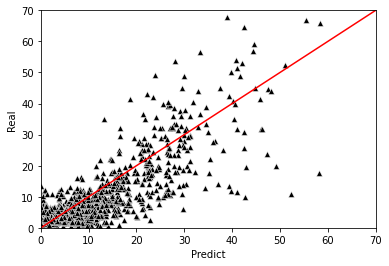

In [ ]:
import seaborn as sns
sns.scatterplot(x = compare['Predict'], y = compare['Real'], marker = '^', color = 'black')
plt.plot([0, 70], [0, 70], color = 'red')
plt.xlim([0, 70])
plt.ylim([0, 70])

In [ ]:
compare['Residual'] = compare['Real'] - compare['Predict']

In [ ]:
compare

,Predict,Real,Residual
0,26.505921,25.46,-1.045921
1,3.445700,3.95,0.504300
2,12.993274,8.09,-4.903274
3,20.375473,9.92,-10.455473
4,14.975351,11.00,-3.975351
...,...,...,...
1107,1.604972,1.00,-0.604972
1108,9.421807,5.50,-3.921807
1109,0.770433,2.90,2.129567
1110,16.334674,19.00,2.665326


Text(0.5, 1.0, 'Box Plot')

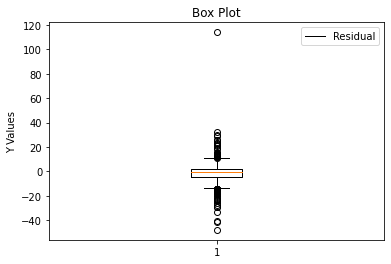

In [ ]:
plt.boxplot(compare['Residual'])#잔차를 matplotlib 라이브러리를 활용하여 그리는 함수
plt.legend(['Residual'])
plt.ylabel('Y Values')
plt.title('Box Plot')

#대칭 형태의 분포를 가짐

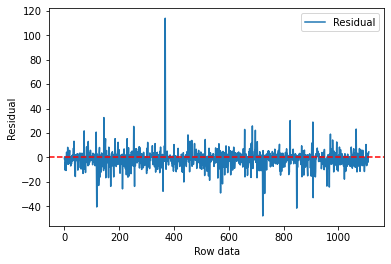

In [ ]:
plt.plot(compare['Residual'])
plt.legend(['Residual'])

plt.xlabel('Row data')
plt.ylabel('Residual')
plt.axhline(0, color = 'red', linestyle = '--')

In [ ]:
#정규성을 검정하는 방법
#시각적으로 검정하는 방법: QQ Plot(Quantile-Quantile Plot)
#사용 이유: 두 확률변수의 분포를 확인해보자(사분위수를 활용하여).
#1분위수: 전체 데이터의 25% 시점의 데이터
#2분위수: 전체 데이터의 중앙값
#3분위수: 전체 데이터의 75% 시점의 데이터

#여기서 활용한 것: 두 확률변수의 분포를 확인하는 것인데, 하나는 '잔차'의 확률변수이고, 다른 하나는 '정규'분포

#x는 잔차를 표준 정규분포로 표현했을 때의 분위수 데이터
#y는 잔차 데이터

#즉, x는 잔차가 표준 정규분포를 따른다고 가정했을 때, 분위수에 대한 값
#그리고, y는 실제 잔차 값

#두 값에 대한 분포를 시각화 하는 방법이 QQ plot이고, 완전 분포가 동일하다면 빨간색 선의 모양을 띔

#선의 모양을 가짐-> 회귀분석의 기본 가정 중 하나인 정규성을 만족한다고 할 수 있음
#잔차가 정규성, 즉 정규 분포를 따른다.

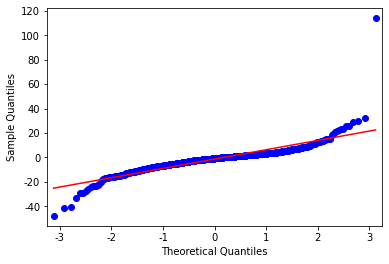

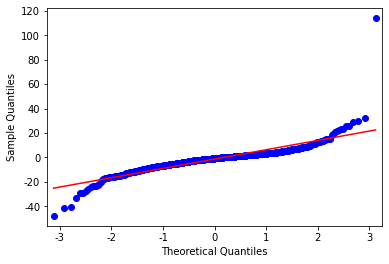

In [ ]:
import statsmodels.api as sm

model_residuals = compare['Residual']
#model_residuals 라는 변수에 '잔차 값' 할당
plt.rcParams['axes.unicode_minus'] = False
sm.ProbPlot(model_residuals).qqplot(line = 's')

Text(0, 0.5, 'Count')

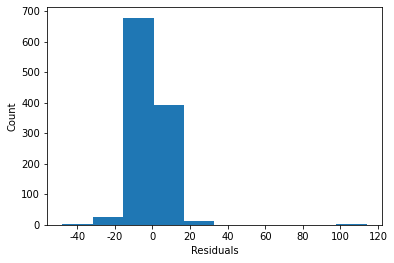

In [ ]:
plt.hist(model_residuals.values)
plt.xlabel('Residuals')
plt.ylabel('Count')
#잔차의 분포
#정규 분포의 형태를 띔

##전진 선택법을 통해 최선의 변수 조합을 선택하였음

##범주형 변수는 고려하지 않은 채, 연속형 변수만 고려하였음